In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


def make_bernoulli(data, max):
    data_mask = (data/255 >= 0.5)
    z = np.zeros(np.shape(data))
    z[data_mask] = 1
    return z

2023-05-03 11:07:51.251735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:

train_mask = np.isin(train_y, [0, 1, 2, 3])
test_mask = np.isin(test_y, [0, 1, 2, 3])

train_X, train_y = train_X[train_mask], train_y[train_mask]
test_X, test_y = test_X[test_mask], test_y[test_mask]

train_X = np.reshape(train_X, (24754, 28*28))
test_X = np.reshape(test_X, (4157, 28*28))

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (24754, 784)
Y_train: (24754,)
X_test:  (4157, 784)
Y_test:  (4157,)


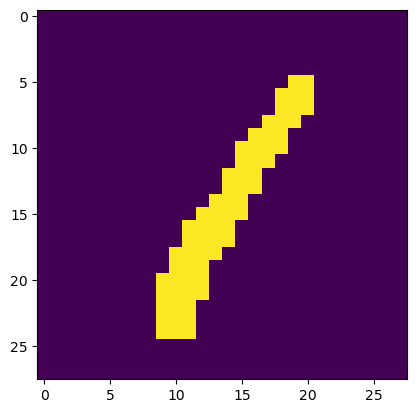

In [4]:
max=np.max(train_X.tolist())
train_X = make_bernoulli(train_X, max)
test_X = make_bernoulli(test_X, max)
plt.imshow(np.reshape(train_X[1], (28,28)))

In [5]:
np.savetxt("./DATA/train_X.txt", train_X, fmt="%i")
np.savetxt("./DATA/test_X.txt", test_X, fmt="%i")
np.savetxt("./DATA/train_y.txt", train_y, fmt="%i")
np.savetxt("./DATA/test_y.txt", test_y, fmt="%i")